<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/PCA/HousingData_PCA_inR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data from kaggle https://www.kaggle.com/datasets/shivachandel/kc-house-data?resource=download

#Data setup
alldat <- read.csv("kc_house_data.csv")
alldat <- alldat[ alldat$sqft_basement !=0, ]
alldat <- alldat[ alldat$bedrooms < 15,] #remove some weird outlier houses
alldat$LogPrice <- log10(alldat$price) #change price to logs!

myvars <- c("LogPrice","sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15")
#the variables with "15" refer to the sqft of the nearest 15 neighbouring houses
# e.g. sqft_living15 is the sqft of the living area in the nearest 15 nhbs

alldat_no_na <- na.omit(alldat)
dat <- alldat_no_na[myvars]
summary(dat)

    LogPrice      sqft_living       sqft_lot         sqft_above  
 Min.   :5.000   Min.   :  680   Min.   :    572   Min.   : 480  
 1st Qu.:5.574   1st Qu.: 1680   1st Qu.:   5000   1st Qu.:1110  
 Median :5.712   Median : 2100   Median :   7540   Median :1370  
 Mean   :5.727   Mean   : 2313   Mean   :  13288   Mean   :1571  
 3rd Qu.:5.852   3rd Qu.: 2710   3rd Qu.:  10720   3rd Qu.:1780  
 Max.   :6.886   Max.   :13540   Max.   :1074218   Max.   :9410  
 sqft_basement    sqft_living15    sqft_lot15    
 Min.   :  10.0   Min.   : 460   Min.   :   651  
 1st Qu.: 450.0   1st Qu.:1560   1st Qu.:  5000  
 Median : 700.0   Median :1880   Median :  7560  
 Mean   : 742.3   Mean   :2024   Mean   : 11386  
 3rd Qu.: 980.0   3rd Qu.:2330   3rd Qu.: 10026  
 Max.   :4820.0   Max.   :6110   Max.   :871200  

Warning message:
“Removed 3 rows containing missing values (geom_point).”


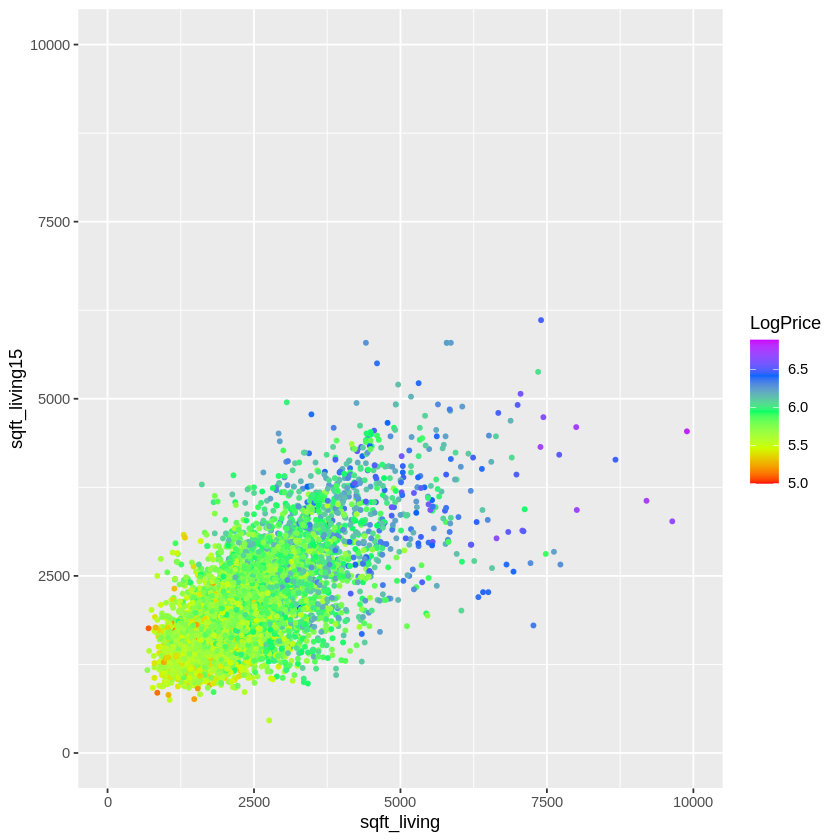

In [ ]:
#Plot some scatter plots!
library(ggplot2)

ggplot(dat)+
geom_point(aes(x=sqft_living,y=sqft_living15, color=LogPrice), size=1) +
scale_color_gradientn(colours = rainbow(5))+
xlim(c(0,10000))+
ylim(c(0,10000))

In [ ]:
fit <- lm(LogPrice ~ ., data = dat)
summary(fit)


Call:
lm(formula = LogPrice ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77630 -0.11208  0.01281  0.11444  0.58466 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.278e+00  5.591e-03 944.073  < 2e-16 ***
sqft_living    6.381e-05  4.853e-06  13.149  < 2e-16 ***
sqft_lot      -1.661e-07  8.081e-08  -2.055   0.0399 *  
sqft_above     8.346e-05  6.111e-06  13.657  < 2e-16 ***
sqft_basement         NA         NA      NA       NA    
sqft_living15  8.960e-05  3.739e-06  23.965  < 2e-16 ***
sqft_lot15    -8.121e-07  1.117e-07  -7.273 3.83e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1582 on 8479 degrees of freedom
Multiple R-squared:  0.5124,	Adjusted R-squared:  0.5121 
F-statistic:  1782 on 5 and 8479 DF,  p-value: < 2.2e-16


In [ ]:
#Do some "PCA"
myvars_no_price <- c("sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15")
dat_no_price <- dat[myvars_no_price]
PCA <- prcomp(dat_no_price, center=TRUE, scale.=TRUE)
summary(PCA)
PCA_dat <- cbind(dat,PCA$x[,1:6])
summary(PCA_dat)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5       PC6
Standard deviation     1.7853 1.2437 0.8071 0.6143 0.48697 3.159e-16
Proportion of Variance 0.5312 0.2578 0.1086 0.0629 0.03952 0.000e+00
Cumulative Proportion  0.5312 0.7890 0.8976 0.9605 1.00000 1.000e+00

    LogPrice      sqft_living       sqft_lot         sqft_above  
 Min.   :5.000   Min.   :  680   Min.   :    572   Min.   : 480  
 1st Qu.:5.574   1st Qu.: 1680   1st Qu.:   5000   1st Qu.:1110  
 Median :5.712   Median : 2100   Median :   7540   Median :1370  
 Mean   :5.727   Mean   : 2313   Mean   :  13288   Mean   :1571  
 3rd Qu.:5.852   3rd Qu.: 2710   3rd Qu.:  10720   3rd Qu.:1780  
 Max.   :6.886   Max.   :13540   Max.   :1074218   Max.   :9410  
 sqft_basement    sqft_living15    sqft_lot15          PC1          
 Min.   :  10.0   Min.   : 460   Min.   :   651   Min.   :-21.1678  
 1st Qu.: 450.0   1st Qu.:1560   1st Qu.:  5000   1st Qu.: -0.7304  
 Median : 700.0   Median :1880   Median :  7560   Median :  0.3943  
 Mean   : 742.3   Mean   :2024   Mean   : 11386   Mean   :  0.0000  
 3rd Qu.: 980.0   3rd Qu.:2330   3rd Qu.: 10026   3rd Qu.:  1.1863  
 Max.   :4820.0   Max.   :6110   Max.   :871200   Max.   :  2.9340  
      PC2                 PC3                PC4       

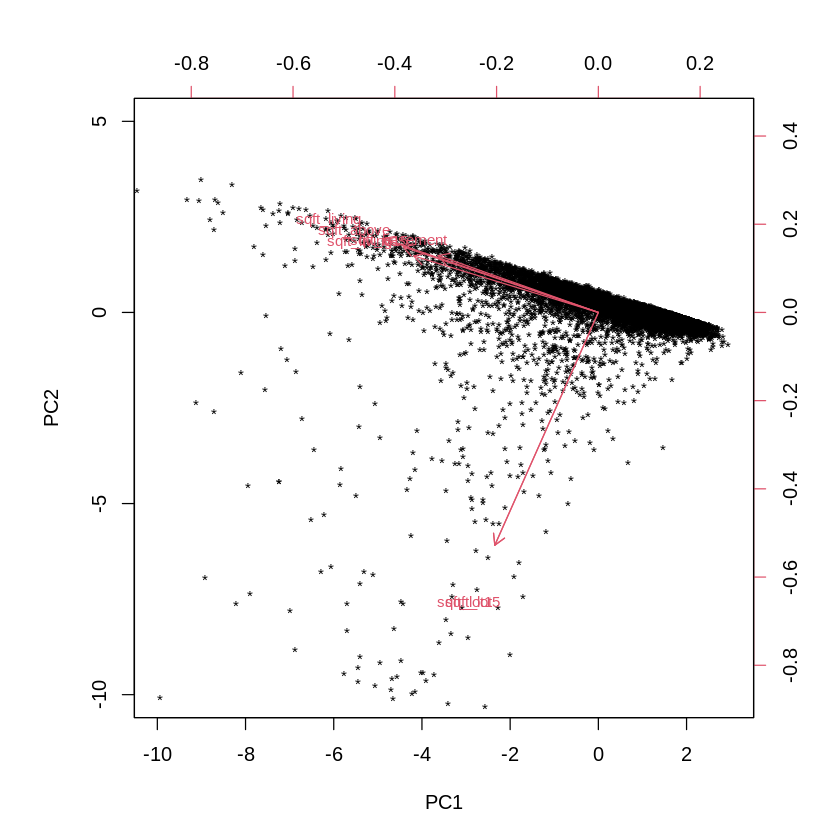

In [ ]:
biplot(PCA,xlabs=rep("*", nrow(PCA_dat)), cex=.75, scale=0,xlim=c(-10,3),ylim=c(-10,5))

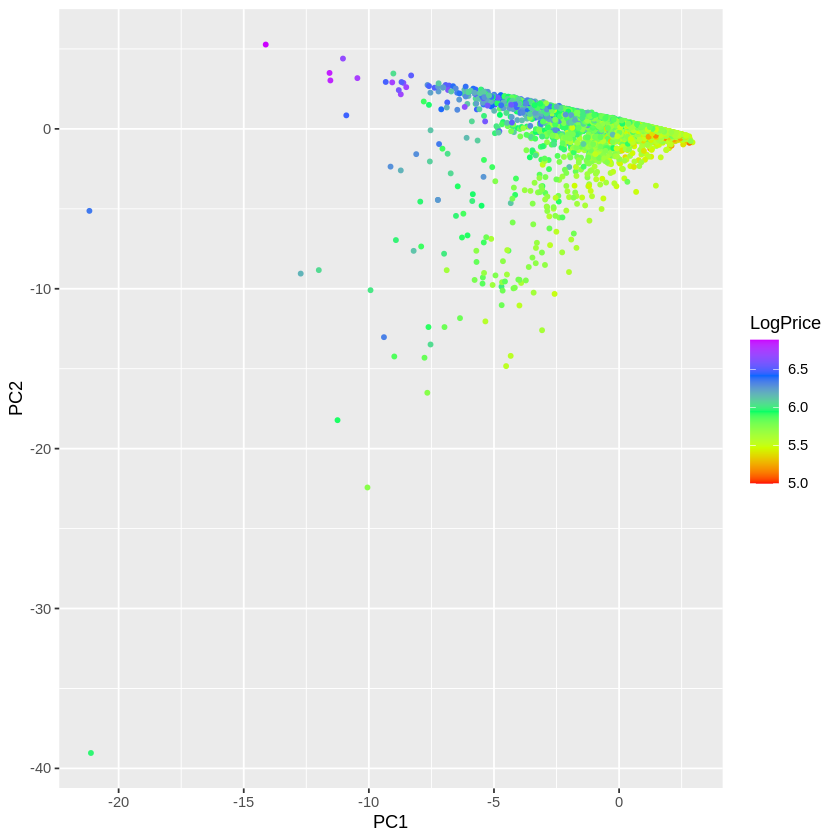

In [ ]:
#Plot again using first two principle components
ggplot(PCA_dat)+
geom_point(aes(x=PC1,y=PC2,color=LogPrice),size=1)+
scale_color_gradientn(colours = rainbow(5))

# Trying linear regression only on Principle components

In [ ]:
fit1 <- lm(LogPrice ~ PC1, data = PCA_dat)
summary(fit1)


Call:
lm(formula = LogPrice ~ PC1, data = PCA_dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47796 -0.12367  0.01138  0.12228  0.60714 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.727003   0.001883 3041.09   <2e-16 ***
PC1         -0.081629   0.001055  -77.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1735 on 8483 degrees of freedom
Multiple R-squared:  0.4138,	Adjusted R-squared:  0.4137 
F-statistic:  5988 on 1 and 8483 DF,  p-value: < 2.2e-16


In [ ]:
fit2 <- lm(LogPrice ~ PC1+PC2, data = PCA_dat)
summary(fit2)


Call:
lm(formula = LogPrice ~ PC1 + PC2, data = PCA_dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84206 -0.11639  0.01234  0.11552  0.56638 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.7270033  0.0017597 3254.59   <2e-16 ***
PC1         -0.0816291  0.0009857  -82.81   <2e-16 ***
PC2          0.0497019  0.0014149   35.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1621 on 8482 degrees of freedom
Multiple R-squared:  0.4882,	Adjusted R-squared:  0.4881 
F-statistic:  4046 on 2 and 8482 DF,  p-value: < 2.2e-16


In [ ]:
fit3 <- lm(LogPrice ~ PC1+PC2+PC3, data = PCA_dat)
summary(fit3)


Call:
lm(formula = LogPrice ~ PC1 + PC2 + PC3, data = PCA_dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79598 -0.11193  0.01317  0.11411  0.55360 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.7270033  0.0017186 3332.34   <2e-16 ***
PC1         -0.0816291  0.0009627  -84.79   <2e-16 ***
PC2          0.0497019  0.0013819   35.97   <2e-16 ***
PC3          0.0431755  0.0021295   20.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1583 on 8481 degrees of freedom
Multiple R-squared:  0.5119,	Adjusted R-squared:  0.5117 
F-statistic:  2965 on 3 and 8481 DF,  p-value: < 2.2e-16


In [ ]:
fit4 <- lm(LogPrice ~ PC1+PC2+PC3+PC4, data = PCA_dat)
summary(fit4)


Call:
lm(formula = LogPrice ~ PC1 + PC2 + PC3 + PC4, data = PCA_dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78256 -0.11206  0.01264  0.11435  0.55411 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  5.7270033  0.0017186 3332.323   <2e-16 ***
PC1         -0.0816291  0.0009627  -84.790   <2e-16 ***
PC2          0.0497019  0.0013819   35.966   <2e-16 ***
PC3          0.0431755  0.0021295   20.275   <2e-16 ***
PC4         -0.0026730  0.0027978   -0.955    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1583 on 8480 degrees of freedom
Multiple R-squared:  0.5119,	Adjusted R-squared:  0.5117 
F-statistic:  2224 on 4 and 8480 DF,  p-value: < 2.2e-16
